# [Based on paper A Neural Probabilistic Language Model](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)
- This paper popularised the vector embedding conecpt solving the curse of dimensionality (due to one hot encoding)
- A lookup table was used to map words to their vector embeddings, which were then updated during training to optimize the language modeling task.
- The embedding captured semantic and syntactic relationships between words

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
# build the vocab and characters and mapping to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0 
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
#build dataset 
# context length: how many characters do we take to predict next one
block_size = 3
X,Y = [],[]
for w in words:
    
    # print(w)
    context = [0]* block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context),'--->',itos[ix])
        context = context[1:] + [ix] #crop and append
X = torch.tensor(X)
Y = torch.tensor(Y)

In [6]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [7]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [8]:
C = torch.randn([27,2])

In [9]:
C

tensor([[-1.7866,  0.1305],
        [ 0.1683,  0.2344],
        [-1.8929,  0.8892],
        [ 0.6840, -1.6162],
        [-0.2063,  0.7282],
        [-0.5255, -0.0806],
        [-1.3414, -1.1107],
        [-0.9001, -1.1453],
        [-0.9350,  0.4636],
        [ 0.8970, -0.5300],
        [-0.5611,  0.3223],
        [-0.3955, -1.2427],
        [-1.2488,  0.2700],
        [-0.7684,  1.7736],
        [-0.2292,  0.8823],
        [-1.2940,  0.9140],
        [ 0.6271,  1.1693],
        [ 0.0494,  0.9846],
        [ 1.6973, -0.9552],
        [-0.8739,  0.4775],
        [ 0.6162,  0.2121],
        [-2.0247,  0.6038],
        [ 0.0711,  0.2274],
        [ 0.7214, -1.5115],
        [ 0.9044, -0.6675],
        [-0.3043,  1.6752],
        [-0.9510, -1.2198]])

In [10]:
#Mapping the X character block (indices) to a 2D vector representation using the embedding lookup table.
#hence no need one hot encoding,thus good for generalization
embed = C[X]
embed.shape


torch.Size([228146, 3, 2])

In [11]:
W1 = torch.randn(6,100)
b1 = torch.randn(100)
embed.shape

torch.Size([228146, 3, 2])

In [12]:
# to embed the input layer options
torch.cat([embed[:,0,:],embed[:,1,:],embed[:,2,:]],1).shape
torch.cat(torch.unbind(embed,dim=1),1).shape
#best options is to use tensor.view as it rearrange feature for the tensor only
# -1 or embed.shape[0]
embed.view(-1,6)

tensor([[-1.7866,  0.1305, -1.7866,  0.1305, -1.7866,  0.1305],
        [-1.7866,  0.1305, -1.7866,  0.1305, -0.5255, -0.0806],
        [-1.7866,  0.1305, -0.5255, -0.0806, -0.7684,  1.7736],
        ...,
        [-0.9510, -1.2198, -0.9510, -1.2198, -0.3043,  1.6752],
        [-0.9510, -1.2198, -0.3043,  1.6752, -0.9510, -1.2198],
        [-0.3043,  1.6752, -0.9510, -1.2198,  0.9044, -0.6675]])

In [13]:
#hidden layer
h = embed.view(-1,6) @ W1 + b1
h.shape

torch.Size([228146, 100])

In [14]:
#output layer
W2 = torch.randn(100,27)
b2 = torch.randn(27)


In [15]:
logits = h @ W2 + b2
logits.shape

torch.Size([228146, 27])

In [16]:
counts = logits.exp()
prob = counts/counts.sum(dim=1,keepdim=True)

In [17]:
prob.shape

torch.Size([228146, 27])

In [18]:
torch.arange(16)
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [19]:
# loss = - prob[torch.arange(16),Y].log().mean()
# loss

# Build dataset and splitting

In [20]:
# build the vocab and characters and mapping to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0 
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)

print(itos)
print(vocab_size)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [21]:
block_size = 3 #context length: how many character do we take to predict the next one ?

def build_dataset(words):
# context length: how many characters do we take to predict next one
    X,Y = [],[]
    for w in words:
        
        # print(w)
        context = [0]* block_size
        for ch in w+'.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context),'--->',itos[ix])
            context = context[1:] + [ix] #crop and append
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape,Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,Ytr = build_dataset(words[:n1])
Xval,Yval = build_dataset(words[n1:n2])
Xtest,Ytest = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


# Steps to optimize the loss (thoughts process/took steps)
### For lr=-0.1, hidden_layer = 100,vector_embedding(C)=2
 - the loss converges at about 2.58 after training alots of time.
 - Introduced decay lr = -0.01 after training some times to decrease the loss decreased at around 2.29
 - Still model is Underfitting(might be due to model being to simple bump hidden layer to 300)
### For lr = -0.1,hidden_layer=300,vector_embedding(C)=2
 - the loss converges at about 2.41 after training 8*10000 times.
 - Introduced decay lr = -0.01 after training some times to decrease the loss decreased at around 2.24
 - Loss is not decreasing,still model is Underfitting(might be due to vector embedding in 2d creating a bottle neck)
### For lr = -0.1,hidden_layer=200,vector_embedding(C)=10
- after training 8*10000 times loss converges at about 2.22
- Introduced decay lr = -0.01 after training some times to decrease the loss decreased at around 2.06
<<<<<<< local
- which is much better parameters than previous hyperparameters
=======
- which is much better parameters than previous hyperparameters

### Implemented BatchNormalization for further bettter performance
>>>>>>> remote

In [22]:
# writing all about neural net layer here
n_embd = 10 #the dimensionality of the character embedding vectors
n_hidden = 200 #the number of neurons in the hidden layer of the MLP

g = torch.Generator().manual_seed(2147483647) #for reproducibility
#C is a lookup table for vector embedding the words
C = torch.randn(vocab_size,n_embd,generator=g)

#input layer x hidden layer
#according to kaiming paper for proper initialization of weights   # gain/(fan_in)**0.5    
W1 = torch.randn(block_size*n_embd,n_hidden,generator=g) *        (5/3)/((block_size*n_embd)**0.5)

#b1 is negated in due to batchnorm as batch norm have its own bias thus commented
# b1 = torch.randn(n_hidden,generator=g) * 0

#hidden layer x output layer
W2 = torch.randn(n_hidden,vocab_size,generator=g) * 0.01
b2 = torch.randn(vocab_size,generator=g) * 0 
bngain = torch.ones((1,n_hidden))
bnbias = torch.zeros((1,n_hidden))

bnmean_running = torch.zeros((1,n_hidden))
bnstd_running = torch.ones((1,n_hidden))

parameters = [C,W1,W2,b2,bngain,bnbias]
print('total number of parameters: ',sum(p.nelement() for p in parameters)) #number of parameters

for p in parameters:
    p.requires_grad = True

total number of parameters:  12097


In [23]:
sum(p.nelement() for p in parameters)
print(X.shape[0])


228146


In [24]:
# selecting learning rate
# lre = torch.linspace(-3,0,1000)
# lre = 10 **lre 


## Mini Batch size Training
- 32 batchsize of data are being processed at a time more efficient and faster for processing the dataset.
- as processing all the dataset(very large) is inefficient and memory intensive not worth it. 

In [38]:
track_loss = []
track_epoch = []
max_steps = 200000
batch_size=32
for epoch in range(max_steps):
    #mini batch construct processing 32 batchsize of dataset a time more efficient
    ix = torch.randint(0,Xtr.shape[0],(batch_size,),generator=g)
    Xb,Yb = Xtr[ix],Ytr[ix] #batch X,Y
    
    #forward pass
    embed = C[Xb] #embed the characters into vectors
    embcat = embed.view(-1,block_size*n_embd) #cocatenate the vectors
    
    #tanh on hidden layer on paper
    hpreact = embcat @ W1 #+ b1 #hidden layer pre-activation
    
    #batch norm layer
    # ======================
    bnmeani = hpreact.mean(0,keepdim=True)
    bnstdi = hpreact.std(0,keepdim=True)
    hpreact = bngain * (hpreact - bnmeani)/bnstdi + bnbias
    with torch.no_grad():
        bnmean_running = 0.999 * bnmean_running + bnmeani * 0.001
        bnstd_running = 0.999 * bnstd_running + bnstdi * 0.001
    # ========================
    
    # non linearity 
    h = torch.tanh(hpreact) #hidden layer
    logits = h @ W2 + b2 #output layer
    loss = F.cross_entropy(logits,Yb) #loss function
     
    # pytorch own cross entropy function
    # counts = logits.exp()
    # prob = counts / counts.sum(1,keepdims=True)
    # loss =- prob[torch.arange(16),Y].log().mean()

    
    #backward pass
    #need to reset gradient for every steps due to different position of loss
    for p in parameters:
        p.grad = None
    loss.backward()
        
    #step learning rate decay
    lr = 0.1 if epoch<100000 else 0.01
    for p in parameters:
        p.data+= -lr * p.grad

    #track stats
    if epoch % 10000 == 0:
        print(f'{epoch:7d}/{max_steps:7d}: loss = {loss.item():.4f}')
        track_epoch.append(epoch)
    # track_lre.append(lre[epoch])
    track_loss.append(loss.log10().item())



      0/ 200000: loss = 1.9493
  10000/ 200000: loss = 2.5851
  20000/ 200000: loss = 1.9095
  30000/ 200000: loss = 2.3090
  40000/ 200000: loss = 2.0938
  50000/ 200000: loss = 2.2836
  60000/ 200000: loss = 2.3761
  70000/ 200000: loss = 2.1950
  80000/ 200000: loss = 2.2936
  90000/ 200000: loss = 2.0769
 100000/ 200000: loss = 2.3722
 110000/ 200000: loss = 1.8325
 120000/ 200000: loss = 2.2619
 130000/ 200000: loss = 2.0563
 140000/ 200000: loss = 2.0832
 150000/ 200000: loss = 2.1425
 160000/ 200000: loss = 1.8463
 170000/ 200000: loss = 2.0628
 180000/ 200000: loss = 2.2631
 190000/ 200000: loss = 2.2419


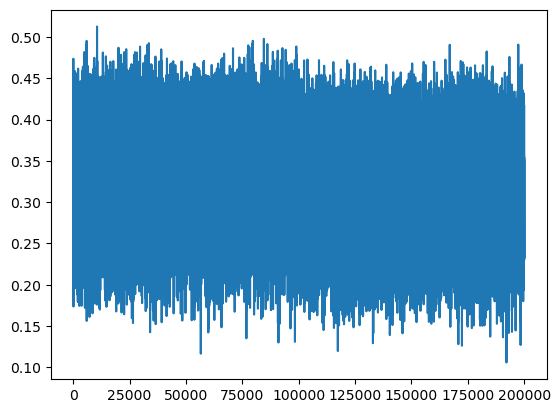

In [39]:
plt.plot(track_loss)
# plt.plot(track_epoch,track_loss)
plt.show()


In [40]:
#calibrate the batch norm at the end of training
# instead of this bnmean_running and bnstd_running is maitained over the training set so that we dont need to calulate
# batch mean and batch std when inferencing
# with torch.no_grad():
    # emb = C[Xtr]
    # embcat = emb.view(emb.shape[0],-1)
    # hpreact = embcat @ W1 + b1
    #measure mean/std over the entire training set
    # bnmean = hpreact.mean(0,keepdim=True)
    # bnstd = hpreact.std(0,keepdim=True)


In [41]:
@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xval, Yval),
    'test': (Xtest, Ytest),
  }[split]
  emb = C[x] # (N, block_size, n_embd)
  embcat = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
  hpreact = embcat @ W1 # + b1
  #hpreact = bngain * (hpreact - hpreact.mean(0, keepdim=True)) / hpreact.std(0, keepdim=True) + bnbias
  hpreact = bngain * (hpreact - bnmean_running) / bnstd_running + bnbias
  h = torch.tanh(hpreact) # (N, n_hidden)
  logits = h @ W2 + b2 # (N, vocab_size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.05173659324646
val 2.099350929260254


In [51]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size 
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      embcat = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
      hpreact = embcat @ W1 # + b1
      hpreact = bngain * (hpreact - bnmean_running) / bnstd_running + bnbias
      h = torch.tanh(hpreact)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs[0], num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))


mora.
kmyah.
see.
mad.
ryla.
reisha.
ejdrie.
cadered.
elin.
shylopaleigh.
vananaraelyzion.
kamin.
shah.
ridhimiel.
kindreelynn.
novana.
ubert.
dariyah.
faeha.
kayshayklyla.


In [35]:
embed = C[Xtr]
h = torch.tanh(embed.view(-1,) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ytr)
loss

RuntimeError: The size of tensor a (200) must match the size of tensor b (100) at non-singleton dimension 1

In [36]:
embed = C[Xval]
h = torch.tanh(embed.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Yval)
loss

RuntimeError: The size of tensor a (200) must match the size of tensor b (100) at non-singleton dimension 1

In [ ]:
embed = C[Xtest]
h = torch.tanh(embed.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ytest)
loss

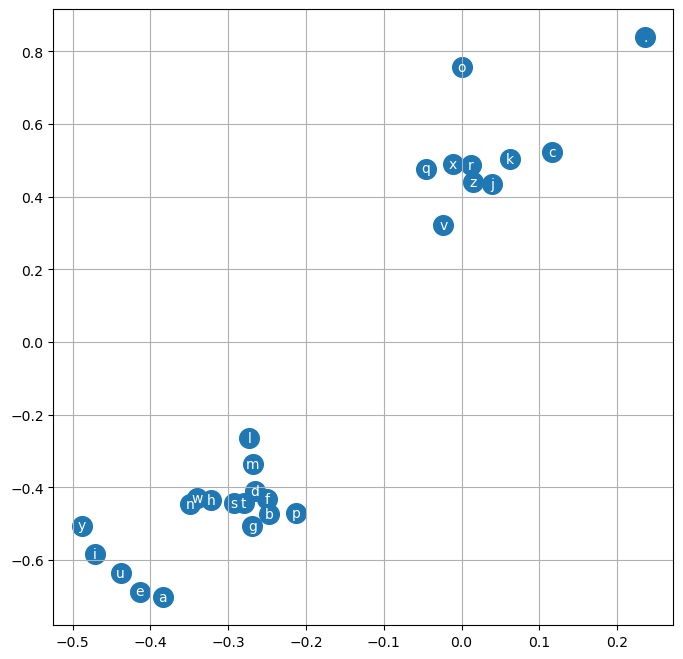

In [261]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
# this visualize only works when C is 2d

plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')
plt.show()

# Interpretation of above graph
- Some commonly repeated words are cluster together in 2d vector embedding from lookup table C
- eg. a,e,i,o,u are vowel and closely related hence scatter together, '.' is special character so it is very further away from all others characters 